Install Dependency

In [1]:
!pip install tensorflow==2.9.1 opencv-python mediapipe sklearn matplotlib 

Import packages

In [2]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time
import mediapipe  as mp

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    result = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,result


In [5]:
def draw_landmarks(image,result):
    mp_drawing.draw_landmarks(image,result.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,result.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image,result):
    mp_drawing.draw_landmarks(image,result.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing. DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image,result.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing. DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(80, 22, 11), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing. DrawingSpec(color=(121, 22, 44), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(121, 22, 44), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing. DrawingSpec(color=(121, 22, 44), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(121, 22, 44), thickness=2, circle_radius=2))

Key points using mp holistics

In [7]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret , frame = cap.read()

        image, result = mediapipe_detection(frame,holistic)

        draw_styled_landmarks(image,result)
        cv2.imshow('frame',image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows
            break
   


In [8]:
len(result.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [9]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [10]:
frame

array([[[  8,  35, 147],
        [  3,  25, 144],
        [  4,  21, 147],
        ...,
        [127, 134, 238],
        [127, 132, 239],
        [127, 132, 239]],

       [[  8,  39, 145],
        [  6,  38, 144],
        [  4,  37, 143],
        ...,
        [131, 135, 239],
        [133, 133, 240],
        [133, 133, 240]],

       [[  8,  41, 143],
        [  8,  43, 143],
        [  5,  42, 141],
        ...,
        [132, 136, 238],
        [136, 135, 238],
        [136, 135, 238]],

       ...,

       [[ 15,  36,  64],
        [ 17,  34,  61],
        [ 20,  33,  59],
        ...,
        [114, 119, 201],
        [112, 121, 200],
        [112, 121, 200]],

       [[ 14,  31,  66],
        [ 18,  30,  62],
        [ 21,  28,  57],
        ...,
        [115, 119, 201],
        [117, 122, 201],
        [117, 122, 201]],

       [[ 20,  27,  65],
        [ 20,  26,  60],
        [ 22,  26,  58],
        ...,
        [111, 121, 203],
        [115, 122, 201],
        [115, 122, 201]]

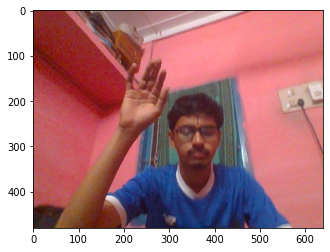

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [12]:
draw_landmarks(frame,result)

In [13]:
result

mediapipe.python.solution_base.SolutionOutputs

In [14]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
                                     color=RED_CO

Extract Keypoint Values

In [15]:
len(result.face_landmarks.landmark)

468

In [16]:
len(result.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [17]:
pose = []
for res in result.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [18]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(132)
face = np.array([[res.x,res.y,res.z,res.visibility] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z,res.visibility] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z,res.visibility] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)

In [19]:
lh = np.array([[res.x,res.y,res.z,res.visibility] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)

In [20]:
rh = np.array([[res.x,res.y,res.z,res.visibility] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)

In [21]:
pose.shape

(132,)

In [22]:
rh

array([ 3.40517551e-01,  5.26484311e-01,  1.79307023e-07,  0.00000000e+00,
        3.88609529e-01,  5.12488961e-01, -1.83387976e-02,  0.00000000e+00,
        4.26735163e-01,  4.66771185e-01, -2.28841957e-02,  0.00000000e+00,
        4.47427839e-01,  4.12431210e-01, -2.59899348e-02,  0.00000000e+00,
        4.62821305e-01,  3.67471039e-01, -2.96824239e-02,  0.00000000e+00,
        4.10941422e-01,  4.07221705e-01, -1.02393469e-02,  0.00000000e+00,
        4.29113746e-01,  3.53672415e-01, -2.33281348e-02,  0.00000000e+00,
        4.39761281e-01,  3.19691747e-01, -3.42901088e-02,  0.00000000e+00,
        4.49751616e-01,  2.87271112e-01, -4.30690758e-02,  0.00000000e+00,
        3.90064240e-01,  3.87993634e-01, -1.12889661e-02,  0.00000000e+00,
        4.07586306e-01,  3.23698968e-01, -2.43693013e-02,  0.00000000e+00,
        4.19969618e-01,  2.81983256e-01, -3.63560691e-02,  0.00000000e+00,
        4.31790441e-01,  2.45281160e-01, -4.52538505e-02,  0.00000000e+00,
        3.65044981e-01,  

In [23]:
pose

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
rh = np.array([[res.x,res.y,res.z,res.visibility] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)

In [25]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
def extract_keypoints(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [27]:
extract_keypoints(result).shape

(1662,)

In [28]:
33*4 + 468*3 + 21*3 + 21*3

1662

Setup folder for collection

In [29]:
Data_path = os.path.join('MP_DATA')

actions = np.array(['hello','thankyou','iloveyou'])

#30 video worth of data
no_sequence = 30
#30 frame in length 
sequence_length = 30

In [30]:
for action in actions: 
    for sequence in range(no_sequence):
        try: 
            os.makedirs(os.path.join(Data_path, action, str(sequence)))
        except:
            pass

 Collect Keypoint Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequence):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, result = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, result)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(result)
                npy_path = os.path.join(Data_path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'hello': 0, 'thankyou': 1, 'iloveyou': 2}

In [35]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(Data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [36]:
np.array(sequences).shape   

(90, 30, 1662)

In [37]:
np.array(labels).shape

(90,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape


(90, 30, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(5, 3)

 Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
actions.shape[0]

3

In [48]:
res = [.7, 0.2, 0.1]

In [49]:
actions[np.argmax(res)]

'hello'

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=130, callbacks=[tb_callback])

Epoch 1/130
3/3 [==============================] - 6s 124ms/step - loss: 1.9661 - categorical_accuracy: 0.4471
Epoch 2/130
3/3 [==============================] - 0s 149ms/step - loss: 13.3034 - categorical_accuracy: 0.2941
Epoch 3/130
3/3 [==============================] - 1s 306ms/step - loss: 12.9514 - categorical_accuracy: 0.2706
Epoch 4/130
3/3 [==============================] - 0s 168ms/step - loss: 15.1978 - categorical_accuracy: 0.2588
Epoch 5/130
3/3 [==============================] - 1s 192ms/step - loss: 7.5484 - categorical_accuracy: 0.3647
Epoch 6/130
3/3 [==============================] - 1s 219ms/step - loss: 6.6962 - categorical_accuracy: 0.2824
Epoch 7/130
3/3 [==============================] - 1s 221ms/step - loss: 3.6863 - categorical_accuracy: 0.2941
Epoch 8/130
3/3 [==============================] - 1s 238ms/step - loss: 10.5545 - categorical_accuracy: 0.3529
Epoch 9/130
3/3 [==============================] - 1s 185ms/step - loss: 10.3509 - categorical_accuracy: 0.2

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

Make Prediction

In [53]:
res = model.predict(X_test)

1/1 [==============================] - 1s 891ms/step


In [54]:
actions[np.argmax(res[4])]

'hello'

In [55]:
actions[np.argmax(y_test[4])]

'thankyou'

Save Weights

In [56]:
model.save('action.h5')

In [57]:
model.load_weights('action.h5')

Evaluation using Confusion Matrix and Accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 69ms/step


In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2., 3.],
        [0., 0.]],

       [[1., 0.],
        [4., 0.]],

       [[2., 2.],
        [1., 0.]]])

In [62]:
accuracy_score(ytrue, yhat)

0.0

 Test in Real Time

In [63]:
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret , frame = cap.read()

        image, result = mediapipe_detection(frame,holistic)

        draw_styled_landmarks(image,result)

        keypoints = extract_keypoints(result)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        cv2.imshow('frame',image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows
            break
   




1/1 [==============================] - 0s 36ms/step
hello
1/1 [==============================] - 0s 44ms/step
hello
1/1 [==============================] - 0s 46ms/step
hello
1/1 [==============================] - 0s 44ms/step
hello
1/1 [==============================] - 0s 46ms/step
hello
1/1 [==============================] - 0s 35ms/step
hello
1/1 [==============================] - 0s 41ms/step
hello
1/1 [==============================] - 0s 39ms/step
hello
1/1 [==============================] - 0s 48ms/step
iloveyou
1/1 [==============================] - 0s 32ms/step
iloveyou
1/1 [==============================] - 0s 35ms/step
iloveyou
1/1 [==============================] - 0s 38ms/step
hello
1/1 [==============================] - 0s 42ms/step
hello
1/1 [==============================] - 0s 42ms/step
hello
1/1 [==============================] - 0s 41ms/step
hello
1/1 [==============================] - 0s 44ms/step
hello
1/1 [==============================] - 0s 37ms/step
hello
1/1 [

In [64]:
model.predict(X_test)

1/1 [==============================] - 0s 97ms/step


array([[0.2152251 , 0.14363688, 0.6411381 ],
       [0.4868607 , 0.3263221 , 0.18681717],
       [0.26252097, 0.19250895, 0.54497015],
       [0.53255206, 0.02537039, 0.44207752],
       [0.7895781 , 0.03016155, 0.18026035]], dtype=float32)

In [65]:
X_test[0].shape

(30, 1662)

In [66]:
np.expand_dims(X_test[0],axis=1).shape

(30, 1, 1662)

In [67]:
res[np.argmax(res)] > threshold

True

In [73]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)   
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

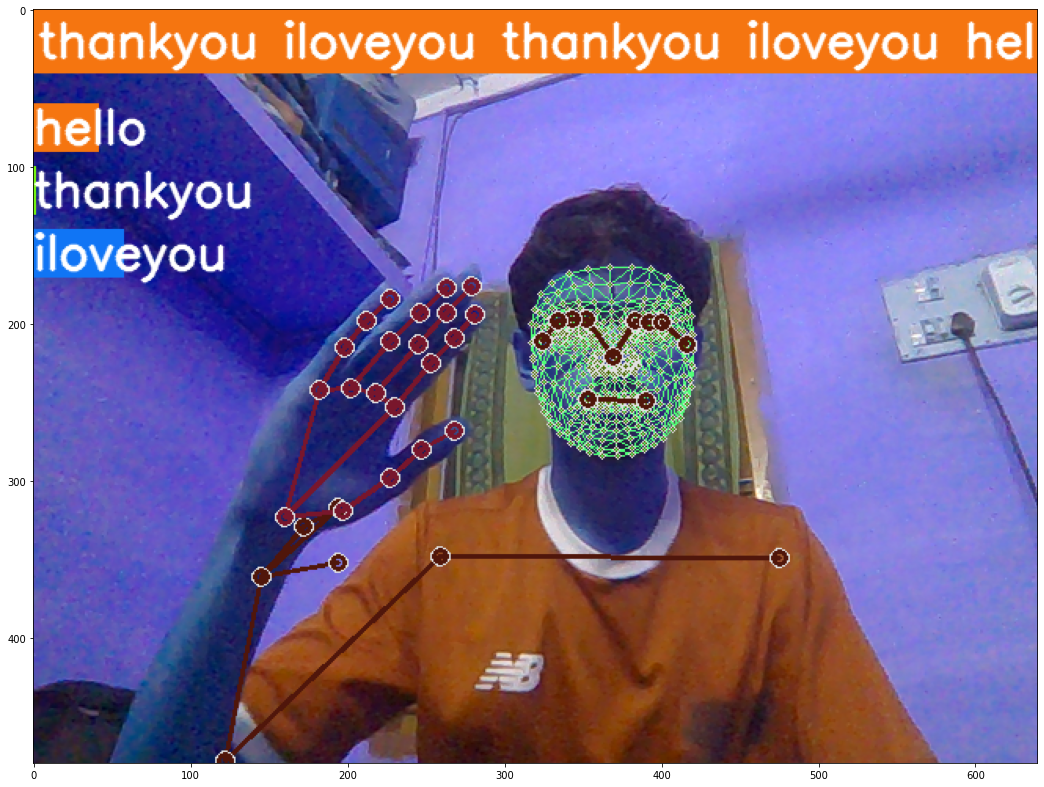

In [72]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))